In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
import pandas as pd

wine_data = pd.read_csv('data/winequality-red.csv')
#print(wine_data)

In [17]:
df = pd.read_csv('data/winequality-red.csv')
df.head();

X = df[["fixed acidity","volatile acidity","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
y = df["quality"]
print(X.shape)
print(y.shape)

df['quality'].describe()

(1599, 10)
(1599,)


count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [18]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [19]:
def isTasty(quality):
    if quality >= 7:
        return 'Excellent'
    elif quality >= 5:
        return 'Medium'
    else:
        return 'Not good'

In [20]:
df['tasty'] = df['quality'].apply(isTasty)

In [21]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'tasty'],
      dtype='object')

In [22]:
df['tasty'].value_counts()

Medium       1319
Excellent     217
Not good       63
Name: tasty, dtype: int64

In [23]:
X = df[["fixed acidity","volatile acidity","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
y = df["tasty"]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
 random_state=5, stratify=y)

(1599, 10)
(1599,)


In [24]:
# Model Accuracy
for d in range(2,10) :
    tree = DecisionTreeClassifier(max_depth=d)
    tree.fit(X_train,y_train)
    y_hat = tree.predict(X_test)
    actual_depth = tree.get_depth()
    print("Depth: ", actual_depth, "Accuracy:", metrics.accuracy_score(y_test, y_hat))

Depth:  2 Accuracy: 0.8375
Depth:  3 Accuracy: 0.85
Depth:  4 Accuracy: 0.834375
Depth:  5 Accuracy: 0.840625
Depth:  6 Accuracy: 0.853125
Depth:  7 Accuracy: 0.84375
Depth:  8 Accuracy: 0.825
Depth:  9 Accuracy: 0.828125


In [25]:
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train,y_train)
y_hat = tree.predict(X_test)
#print(y_test)
#print(y_hat)
#print(y_hat.shape)

print("Accuracy:", metrics.accuracy_score(y_test, y_hat))

Accuracy: 0.853125


In [26]:
cm = confusion_matrix(y_test, y_hat)
cm = confusion_matrix(y_test, y_hat, labels=['Excellent','Medium','Not good'])
print(cm)

[[ 20  23   0]
 [  9 252   3]
 [  0  12   1]]


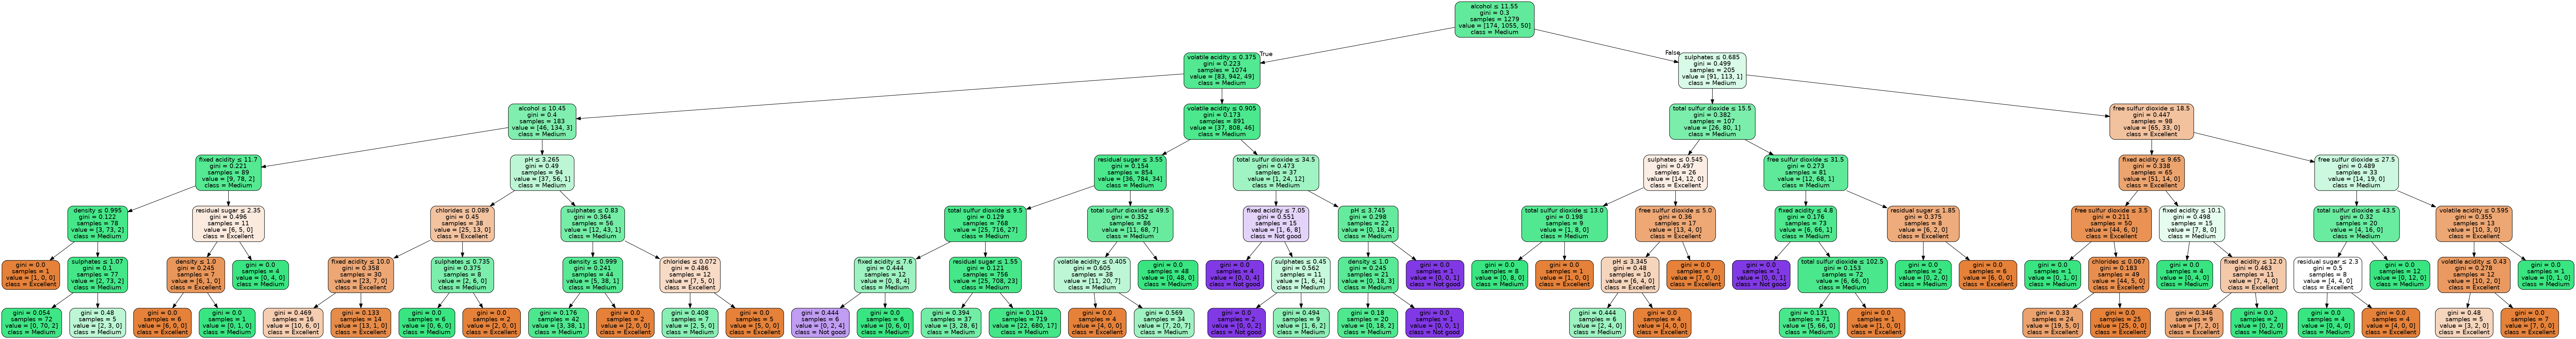

In [27]:
feature_names = ["fixed acidity","volatile acidity","residual sugar","chlorides","free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol"]
target_names = ["Excellent","Medium","Not good"]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('plots/wine_classification.png')
Image(graph.create_png())

